# LightGBM 
- LightGBM은 XGBoost와 함께 인기있는 부스팅계열 모델
- 장점 : 학습과 예측속도가 XGBoost에 비해 빠름, 카테고리형 피처 자동 변환

- 트리 분할 : 리프 중심 트리 분할 방식
- 장점 : 예측 오류 손실 최소화
- 단점 : 오버피팅에 약함


### LightGBM 하이퍼파라미터
- n_estimators(d=100) : 반복 수행하는 트리개수 (크면 성능올라가나 너무 크면 과적합) 
- learning_rate(d=0.1) : 튜닝시 0.5, 0.3 으로 내려가거나 함수활용한다.
- Boostiong type

1. GBDT(d) 
2. GOSS : Gradient 값이 상대적으로 큰 값만 선택적으로 재학습, 수행시간 향상되지만 모델 성능은 별로
3. DART : 트리 자체를 drop out 방식 ,수행시간이 길고 early starting이 안됨
- 보통 1, 3 번 방식을 많이 사용

[트리]
- max_depth(d=1) : 깊이, Level-wise 방식보단 leaf wise 방식이 상대적으로 깊음
- min_child_sample(min_data_in_leaf)(d=20) : 리프노드 수
- num_leaves(d=31) : 하나의 트리가 가질 수 있는 최대 리프 갯수

[샘플링]
- sub_sample(bagging_faction)(d=1.0) 행 샘플링
- colsample_bytree(feature_fraction)(d=1.0) 컬럼에 대한 샘플링

[하이퍼 파라미터 튜닝]
- Grid Search : 일정 값을 정하면 실시, 시간이 많이 걸림
- Random Search
- Bayesian Optimaization
- 일정 시간 내에는 Random Search가 성능이 좋음 그러나 Grid와 Random은 이전 결과를 반영하지 못함, Bayesian Optimaization는 이전에 결과를 살려서 짧은 반복을 통해 최적화 


In [4]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [5]:
data = load_breast_cancer()

In [9]:
ftr = data.data
target = data.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.3, random_state=123)
lgbm_wrapper = LGBMClassifier(n_estimators=400)

In [11]:
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',
                 eval_set = evals, verbose=True)

c:\Users\A\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\A\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.595493
[2]	valid_0's binary_logloss: 0.529971
[3]	valid_0's binary_logloss: 0.478079
[4]	valid_0's binary_logloss: 0.432102
[5]	valid_0's binary_logloss: 0.38968
[6]	valid_0's binary_logloss: 0.356294
[7]	valid_0's binary_logloss: 0.329438
[8]	valid_0's binary_logloss: 0.304419
[9]	valid_0's binary_logloss: 0.278114
[10]	valid_0's binary_logloss: 0.258856
[11]	valid_0's binary_logloss: 0.238508
[12]	valid_0's binary_logloss: 0.221845
[13]	valid_0's binary_logloss: 0.207789
[14]	valid_0's binary_logloss: 0.192637
[15]	valid_0's binary_logloss: 0.179938
[16]	valid_0's binary_logloss: 0.16856
[17]	valid_0's binary_logloss: 0.161137
[18]	valid_0's binary_logloss: 0.153157
[19]	valid_0's binary_logloss: 0.145992
[20]	valid_0's binary_logloss: 0.137745
[21]	valid_0's binary_logloss: 0.132207
[22]	valid_0's binary_logloss: 0.12705
[23]	valid_0's binary_logloss: 0.1222
[24]	valid_0's binary_logloss: 0.116341
[25]	valid_0's binary_logloss: 0.111439
[26]	valid_0's

LGBMClassifier(n_estimators=400)

In [12]:
preds = lgbm_wrapper.predict(X_test)

In [13]:
def get_clf_eval(y_test,y_pred) :
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n',confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정확도: {:.4f}'.format(precision))
    print('재확도: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [14]:
get_clf_eval(y_test,preds)

오차행렬:
 [[ 66   2]
 [  2 101]]

정확도: 0.9766
정확도: 0.9806
재확도: 0.9806
F1: 0.9806
AUC: 0.9756


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

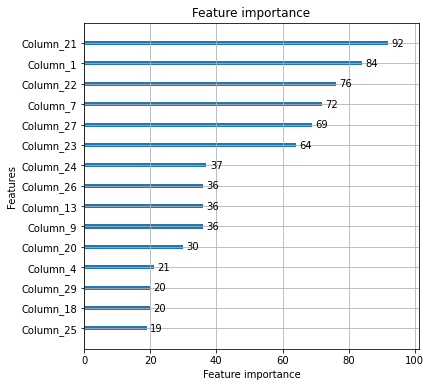

In [16]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize=(6,6))
plot_importance(lgbm_wrapper,max_num_features=15,ax=ax)